In [1]:
import sys
import numpy
import pandas
import matplotlib
import sklearn

In [3]:
print(f'Python: {sys.version}')
print(f'Numpy: {numpy.__version__}')
print(f'Pandas: {pandas.__version__}')
print(f'matplotlib: {matplotlib.__version__}')
print(f'sklearn: {sklearn.__version__}')

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.23.0
matplotlib: 2.2.2
sklearn: 0.19.1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
# Loading the dataset
# Note: Change the path to the datset according to your location.

games = pandas.read_csv('board-game-prediction/games.csv')

In [9]:
games.shape

(81312, 20)

In [15]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

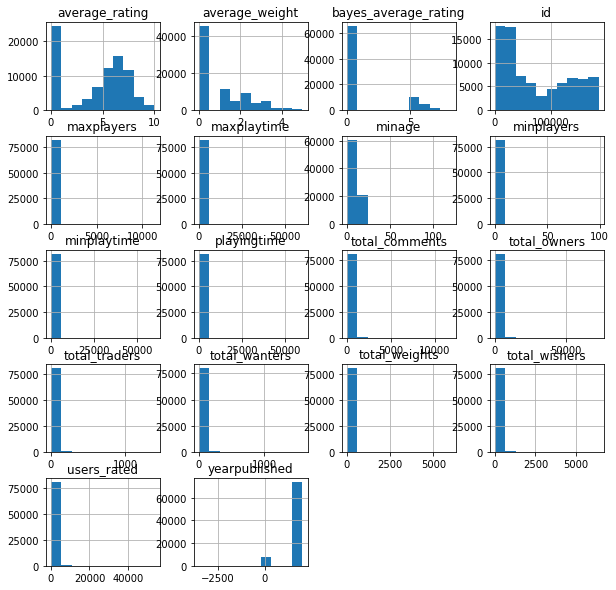

In [20]:
# We are trying to predict average rating here
games.hist(figsize=(10,10))
plt.show()

In [26]:
# Print the first row of all the games with zero scores
(games[games['average_rating'] == 0].iloc[0]
# So we can see that the game doesn't exist at all!

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

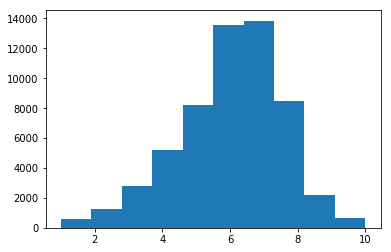

In [27]:
# So lets preprocess the dataset
games = games[games['average_rating']>0]

# Remove any rows with missing values
games = games.dropna(axis=0)

# Now let us plot the preprocessed dataset
plt.hist(games['average_rating'])
plt.show()

In [28]:
games.shape

(56894, 20)

In [29]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


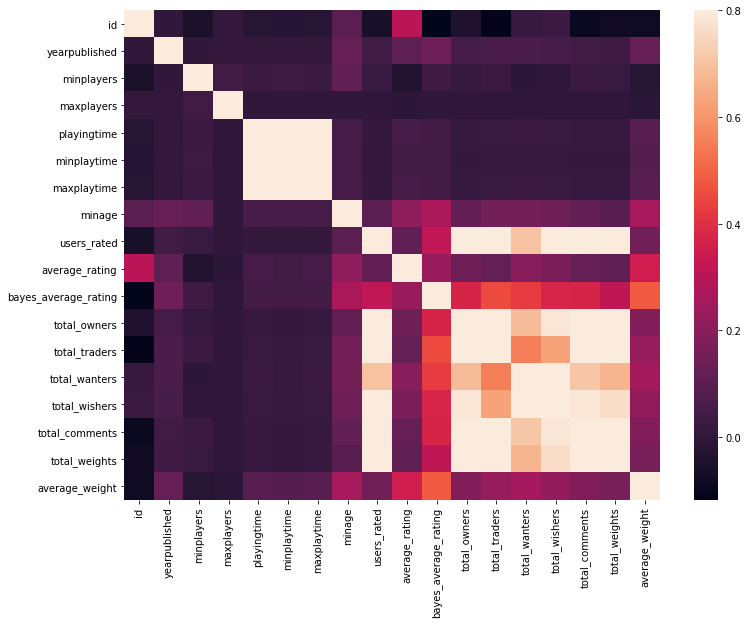

In [32]:
# lets see the correlation between the features

#Compute pairwise correlation of columns, excluding NA/null values
corrmat = games.corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=0.8)
plt.show()

In [33]:
# Get all the columns from the dataframe

columns = list(games.columns)

In [36]:
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['bayes_average_rating',
                                           'average_rating',
                                           'type','id',
                                          'name']]
           
# Store the prediction variable
target = 'average_rating'

In [37]:
# Generate the training and test datasets
from sklearn.model_selection import train_test_split

# Generate training set
train = games.sample(frac=0.8, random_state=1)

In [48]:
# Generate the test dateset
test = games[~games.index.isin(train.index)]

In [49]:
print(train.shape, test.shape)

(45515, 20) (11379, 20)


In [56]:
# Import linear regressor model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
LR = LinearRegression()

# fit the model to the trianing data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# Generate the predictions for the testing set
predictions = LR.predict(test[columns])

# Calculate the error
mse = mean_squared_error(predictions, test[target])
print(mse)

2.0788190326293248


In [59]:
# Now lets check for the non-linear model

In [61]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# fit to the training data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [62]:
# Make predictions
predictions = RFR.predict(test[columns])

# compute the errir b/w the test pred and actual values
mean_squared_error(predictions, test[target])

1.4458564605687358

In [73]:
# Example demonstration
sample = test[columns].iloc[0]
sample = sample.values.reshape(1,-1)
print(sample.shape)

(1, 15)


In [74]:
rating = LR.predict(sample)
print(rating)

[8.12061283]


In [76]:
rating_rfr = RFR.predict(sample)
print(rating_rfr)

[7.91373581]


In [77]:
# Let's see the actual prediction
actual = test[target].iloc[0]
print("actual: ", actual)

actual:  8.07933
